In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp
import matplotlib.pylab as plt

In [2]:
survey_length = 3.5 # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals()['y']
bfs = []
# Target number of observations
bfs.append(fs.Target_map_basis_function(filtername='y', target_map=target_map))
# Mask everything but the South
bfs.append(fs.Quadrant_basis_function(quadrants=['S'], azWidth=30., maxAlt=82.))
# throw in the depth percentile for good measure
bfs.append(fs.Depth_percentile_basis_function())

weights = np.array([1., 1., 1.])

#survey = fs.Marching_army_survey(bfs, weights, npick=40)
# Try out pairs!
survey = fs.Marching_army_survey_pairs(bfs, weights, npick=40)
scheduler = fs.Core_scheduler([survey])

In [3]:
observatory = Speed_observatory()#mjd_start=59713.2497538825)
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='y_marching_south.db')

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


progress = 106.1%Completed 3492 observations


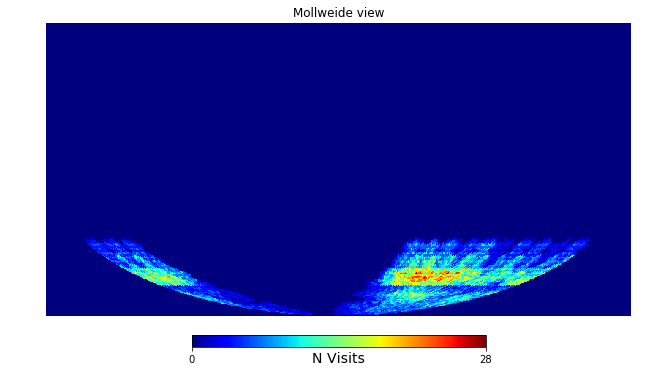

In [4]:
hp.mollview(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature, cmap='jet', unit='N Visits')

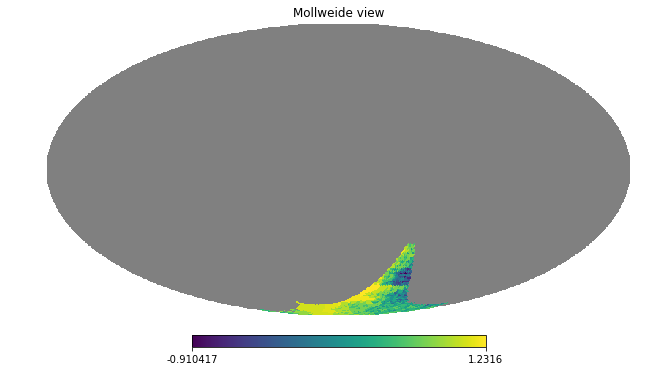

In [5]:
hp.mollview(scheduler.surveys[0].reward)

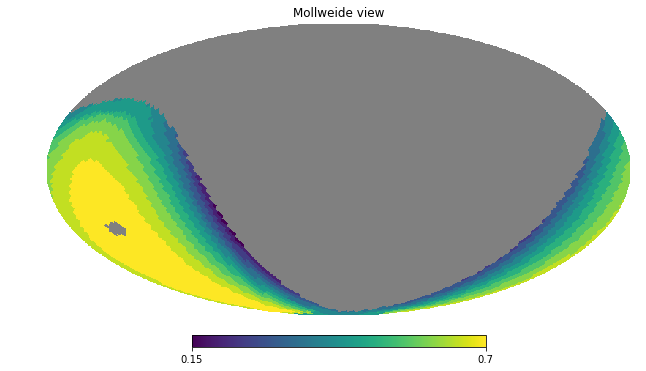

In [6]:
hp.mollview(scheduler.surveys[0].basis_functions[2]() )

In [7]:
scheduler.surveys[0].basis_functions

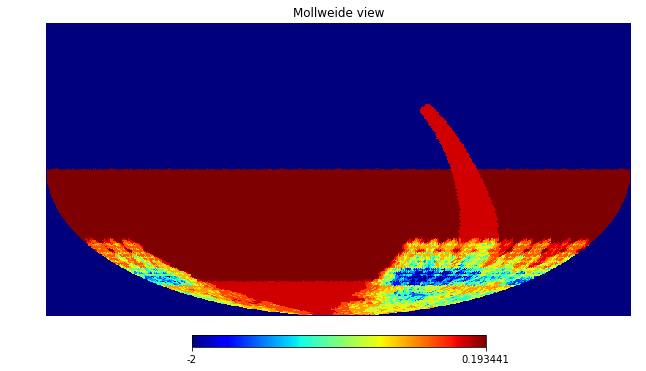

In [7]:
hp.mollview(scheduler.surveys[0].basis_functions[0](), cmap='jet', min=-2)

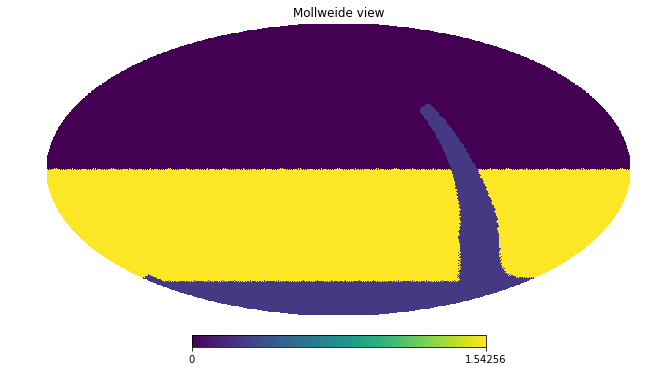

In [9]:
region = np.where(target_map > 0)
n_obs_goal = np.sum(target_map[region])
n_pix_obs = np.sum(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature[region])
n_obs_goal, n_pix_obs
#hp.mollview(target_map-scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature/n_pix_obs * n_obs_goal)
hp.mollview(target_map*n_pix_obs/n_obs_goal)
#np.unique(target_map*n_pix_obs/n_obs_goal)
#hp.mollview((target_map*n_pix_obs/n_obs_goal-scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature)/10.)

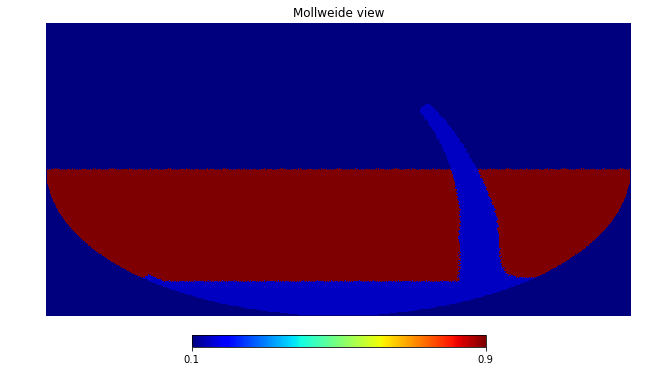

In [10]:
hp.mollview(target_map, min=0.1, cmap='jet')

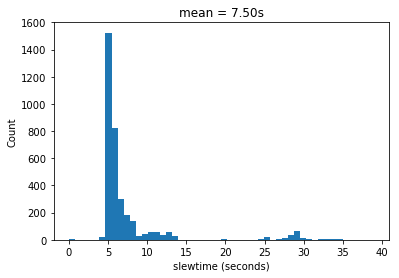

In [8]:
none = plt.hist(observations['slewtime'], bins=50)
plt.xlabel('slewtime (seconds)')
plt.ylabel('Count')
plt.title('mean = %.2fs' % np.mean(observations['slewtime']))

In [9]:
np.mean(observations['slewtime']), np.median(observations['slewtime'])

(7.4987247660373892, 5.5045642145055869)

In [10]:
observations['slewtime'][0:80]

array([  0.        ,   4.75638973,   5.38485612,   4.73560614,
         5.38611541,   5.365031  ,   5.90361661,   6.01196231,
         5.37293211,   5.38966148,   5.4111327 ,   5.17663191,
         5.42684529,   5.40046752,   5.38315648,   5.37103951,
         9.84238372,   6.02240677,   5.35852172,   5.37900793,
         5.40463526,   4.74967186,   5.4082224 ,   5.37286601,
         5.42618198,   7.19453749,  11.55298132,   4.77491185,
        10.21330522,   7.23570928,   5.7944229 ,   5.35896664,
         4.78296498,   5.35828924,   5.86792192,   7.16023483,
         6.50655859,   5.84605128,   4.79888354,   5.77724324,
        25.59093763,   5.33186994,   5.42154761,   5.37261085,
         5.40549649,   5.39088067,  12.44289803,   7.66274606,
         5.47502084,   5.37315366,   5.39731112,   4.78257826,
         5.39804286,   5.35741569,   5.98237905,   8.03151763,
        11.18947637,  10.62604823,   7.67398373,   6.14682966,
         5.3394608 ,   4.80813469,   5.33724918,   6.13

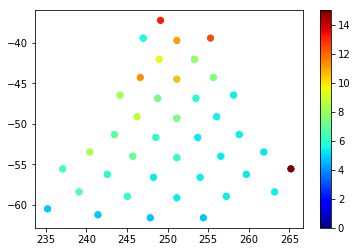

In [11]:
i1 = 0
i2=80
plt.scatter(observations['RA'][i1:i2], observations['dec'][i1:i2], c=observations['slewtime'][i1:i2], cmap='jet', vmax=15)
plt.colorbar()

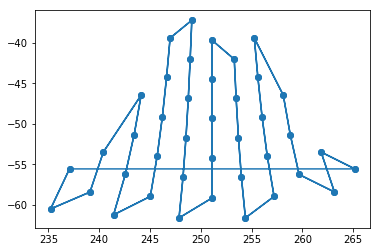

In [12]:
plt.plot(observations['RA'][i1:i2], observations['dec'][i1:i2], 'o-')


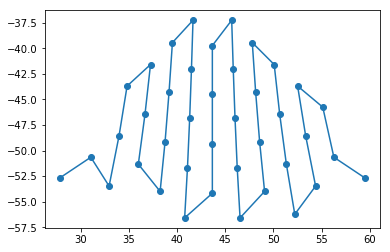

In [18]:
plt.plot(observations['RA'][0:40], observations['dec'][0:40], 'o-')